### **Libraries**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statistics
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# -------------------------------
import os
import tarfile
import urllib
import sklearn

In [20]:
from termcolor import colored
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.base import clone, BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [3]:
sklearn.__version__

'1.2.1'

### **MNIST**

**MNIST DATASET :** 


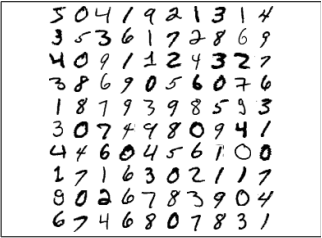

In [4]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() # dataset loaded by Scikit-learn

C:\Users\CihangirA\AppData\Local\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Length of X:  (70000, 784)
Length of Y:  (70000,)


X is: 


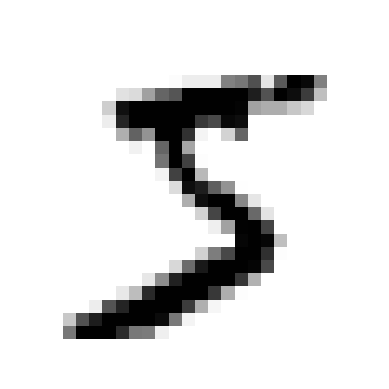

Y is:  5


In [5]:
X, Y = mnist['data'], mnist['target']
print(colored('Length of X: ', 'blue'), X.shape)
print(colored('Length of Y: ', 'blue'), Y.shape)
some_digit = X.iloc[0]  
# have to use .iloc() otherweise returns KeyError 
some_digit_image = some_digit.values.reshape(28,28) 
# series object has no reshape ==> values.reshape()
print('\n')
print(colored('X is: ', 'blue'))
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show();
print(colored('Y is: ', 'blue'), Y[0])
Y = Y.astype(np.uint8)

In [6]:
# We should always create TEST and TRAIN SETS
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], X[60000:]
# some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar 
# instances in a row. Shuffling the dataset ensures that this won’t happen

### **Training a Binary Classifier**

In [7]:
Y_train_5 = (Y_train == 5) # true for all 5
Y_test_5 = (Y_test == 5)
# STOCHASTIC GRADIENT DESCENT CLASSIFIER = has the advantage of being capable of handling very large datasets efficiently
sgd_clf = SGDClassifier(random_state = 42)
print(colored('Model: ', 'blue'), sgd_clf.fit(X_train, Y_train_5))

Model:  SGDClassifier(random_state=42)


### **Measuring Acc Using Cross-Validation**

In [8]:
"""skfolds = StratifiedKFold(n_splits=3,  shuffle=True, random_state=42)
for train_index, text_index in skfolds.split(X_train, Y_train_5):
    cloen_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    Y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    Y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, Y_train_folds)
    Y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(Y_pred == Y_test_fold)
    print(n_correct / len(Y_pred))"""

'skfolds = StratifiedKFold(n_splits=3,  shuffle=True, random_state=42)\nfor train_index, text_index in skfolds.split(X_train, Y_train_5):\n    cloen_clf = clone(sgd_clf)\n    X_train_folds = X_train[train_index]\n    Y_train_folds = (y_train_5[train_index])\n    X_test_fold = X_train[test_index]\n    Y_test_fold = (y_train_5[test_index])\n    clone_clf.fit(X_train_folds, Y_train_folds)\n    Y_pred = clone_clf.predict(X_test_fold)\n    n_correct = sum(Y_pred == Y_test_fold)\n    print(n_correct / len(Y_pred))'

In [9]:
print(colored('Accuracy: ', 'blue'), cross_val_score(sgd_clf, X_train, Y_train_5, cv=3, scoring='accuracy'))

Accuracy:  [0.95035 0.96035 0.9604 ]


In [11]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
print(colored('Accuracy: ', 'blue'), cross_val_score(never_5_clf, X_train, Y_train_5, cv=3, scoring='accuracy')) # %10 images are 5 

Accuracy:  [0.91125 0.90855 0.90915]


### **Confusion Matrix**

In [10]:
Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train_5, Y_train_pred)
# we have an error here.. because of cross-validation code..

array([[5915, 6663, 5976, 5314, 6132, 1340, 6045, 5941, 5633, 5620],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

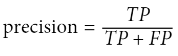
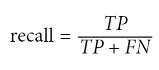

*TP : true positive, FN: false negative*

In [21]:
# we cannot see the result
#print(colored('Precision: ', 'blue'), precision_score(Y_train_5, Y_pred))
#print(colored('Recall: ', 'blue'), recall_score(Y_train_5, Y_train_pred))
#print(colored('F1 Score: ', 'blue'), f1_score(Y_train_5, Y_pred))